In [2]:
import numpy as np
import pandas as pd
from scipy.stats import t
import torch
import numpy as np
from matplotlib import gridspec
import copy
import normflows as nf

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import copy
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import gc
import sys

from normflows.experiments.flowslib import planar, radial, nice, rnvp, nsp, iaf, residual

import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import torch
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import pandas as pd
import numpy as np
from skbio import DistanceMatrix
from skbio.stats.distance import permanova
import gower
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ks_2samp, mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
import pandas as pd
import numpy as np
import gower
from skbio.stats.distance import permanova
from skbio import DistanceMatrix
from sklearn.ensemble import GradientBoostingClassifier
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from fastDP import PrivacyEngine
from opacus.accountants.utils import get_noise_multiplier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import model_selection, mixture, preprocessing, preprocessing

class CSVDataset(Dataset):
    def __init__(self, file_path, categorical_column_names, transform=None):
        self.data = pd.read_csv(file_path,header=None)
        # scaler = preprocessing.StandardScaler()
        # self.data = pd.DataFrame(scaler.fit_transform(self.data))
        
        
        self.transform = transform
        self.label_encoders = {}
        self.categorical_column_names = categorical_column_names
        
        # Encode the categorical columns
        for column_name in self.categorical_column_names:
            self.label_encoders[column_name] = LabelEncoder()
            categorical_column = self.data[column_name].astype(float)
            encoded_categorical_column = self.label_encoders[column_name].fit_transform(categorical_column)
            self.data[column_name] = encoded_categorical_column
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # Retrieve item at the given index
        item = self.data.iloc[index]
        
        # Apply data transformation if provided
        if self.transform:
            item = self.transform(item)
        
        # Convert item to tensors if needed
        item = torch.tensor(item).float()
        
        return item
    
    def calculate_feature_means(self):
        category_means = []
        
        # Calculate means for each category
        for column_name in self.data.columns:
            category_means.append(self.data[[column_name]].mean().iloc[0])
            
        return category_means
    
def compute_average_grad_norm(model):
    total_norm = 0.0
    num_parameters = 0
    for p in model.parameters():
        if p.grad is not None:
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
            num_parameters += 1
    return (total_norm / num_parameters) ** 0.5

np.random.seed(42)


#b = torch.Tensor([1 if i % 2 == 0 else 0 for i in [0]])

#X = X.drop(['Class'],1)
# from sklearn.preprocessing import MinMaxScaler
# from collections import Counter

# # Original dataset
# from normflows.utils import data_utils

# X = pd.read_csv('power.csv').drop(['Unnamed: 0'],axis=1)


# xcol = X.columns
# # for ii in range(len(categorical)):
# #     X[X.columns[categorical[ii]]] = X[X.columns[categorical[ii]]] * lcm / categorical_qlevels[ii]
# X=X.values
# dataset = TensorDataset(torch.tensor(X, dtype=torch.float32))
# num_samples = 2**9
# train_loader = torch.utils.data.DataLoader(dataset, batch_size=num_samples,num_workers=4)
# train_iter = iter(train_loader)
latent_size = 10
categorical = []
categorical_qlevels = []
catlevels = []
lcm = 0
vlayers = []
#b = torch.Tensor([1 if i % 2 == 0 else 0 for i in [0]])

#X = X.drop(['Class'],1)

# Original dataset


categorical = []

In [7]:
# %%


my_dataset = CSVDataset('/home/samiri/SynDG/DOFLOWS/lifesci.csv',categorical)

categorical_qlevels = []
vdeq_categoricals = {int(k): int(v) for k, v in zip(categorical, categorical_qlevels)}
# Number of samples

enable_cuda = True

device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')

n_sammple = my_dataset.__len__()
# Create the 2-dimensional instance
loss_arr = []
tests_arr = []
_closs = 1e10
_stalecounter = 0

nl = 40
w = 256
ml = 4
lr = 5e-4
fltyp = 'nice'
rbst = True
vlay = 0
nsamp = 2048
nmodes = 200
rndadd = 0.5
usestd = True
useloc = True
initp = 2.5
batch_size = 2**10


dp = 'NF'
dp = None
    # for w in list(reversed([64,128,192,256,378,512,768,1024,2048,4096,8192])):    
_closs = 1e10
torch.cuda.empty_cache()
gc.collect()
try:
    del model, optimizer, flows, base
except:
    pass
dataloader = DataLoader(my_dataset, batch_size=batch_size, shuffle=True)
num_layers = nl
flows = []
latent_size = len(my_dataset.__getitem__(0))
b = torch.Tensor([1 if i % 2 == 0 else 0 for i in range(latent_size)])
flows = []
if fltyp == 'nsp':
    flows = nsp(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'rnvp':
    flows = rnvp(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'residual':
    flows = residual(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'nice':
    flows = nice(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
    

trnbl = True
# base = nf.distributions.base_extended.GeneralizedGaussianMixture(n_modes=nmodes, rand_p=True, noise_scale=rndadd, dim=latent_size,loc=list(my_dataset.data.median()) if useloc else 0.,scale=list(my_dataset.data.std()) if usestd else 1.,p=initp,device=device,trainable_loc=trnbl, trainable_scale=trnbl,trainable_p=trnbl,trainable_weights=trnbl,ds=my_dataset)

#model = nf.NormalizingFlow(base, flows)
loss_hists = np.array([])
# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lr/10)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)
# target_epsilon = 1.0
# if dp == 'DPSGD':
#     sigma=get_noise_multiplier(
#                     target_epsilon = target_epsilon,
#                     target_delta = 1.52e-5,
#                     sample_rate = batch_size/(len(dataloader.dataset)*0.9),
#                     epochs = max_iter,
#                 )

#     privacy_engine = PrivacyEngine(
#                 model,
#                 batch_size=batch_size,
#                 sample_size=len(dataloader.dataset)*0.9,
#                 noise_multiplier=sigma,
#                 epochs=max_iter,
#                 clipping_mode='MixOpt',
#                 origin_params=None,
#             )
#     privacy_engine.attach(optimizer)










max_norm = 0.5
adjust_rate = 0.01
num_samples = nsamp
show_iter = 200
max_iter = 300
bestloss = 1e10
_stalecounter = 0
pbar = tqdm(range(max_iter))
# Prepare the data for KFold
data = list(dataloader.dataset)
kf = KFold(n_splits=10)

# To store average log likelihood for each epoch
avg_log_likelihoods = []
loss_hists = []

for train_index, test_index in kf.split(data):
    # Reset the model and the best loss for each fold
    base = nf.distributions.base.DiagGaussian(latent_size)
    if dp == 'NF':
        cmin = -10.01
        cmax = 10.01    
        
        base = nf.distributions.base_extended.TruncatedNormal(latent_size,0.,1., cmin, cmax)
        s = base.sample(10000)
        pl = base.log_prob(s).exp()
        print(f'final consumed budget in interval {[cmin,cmax]} is ', np.log(pl.max().item()/pl.min().item())*np.sqrt(max_iter))

    model = nf.NormalizingFlow(base, flows,categoricals=vdeq_categoricals, vardeq_layers=vlay, vardeq_flow_type='shiftscale')
    model = model.to(device)





    loss_hist = np.array([])

    log_likelihoods = []

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lr/10)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)
    target_epsilon = 1.0
    if dp == 'DPSGD':
        sigma=get_noise_multiplier(
                        target_epsilon = target_epsilon,
                        target_delta = 1.52e-5,
                        sample_rate = batch_size/(len(dataloader.dataset)*0.9),
                        epochs = max_iter,
                    )

        privacy_engine = PrivacyEngine(
                    model,
                    batch_size=batch_size,
                    sample_size=len(dataloader.dataset)*0.9,
                    noise_multiplier=sigma,
                    epochs=max_iter,
                    clipping_mode='MixOpt',
                    origin_params=None,
                )
        privacy_engine.attach(optimizer)










    max_norm = 0.5
    adjust_rate = 0.01

    best_params = copy.deepcopy(model.state_dict())
    bestloss = 1e10
    _stalecounter = 0
    pbar = tqdm(range(max_iter))

    
    bestloss = float('inf')
    best_params = copy.deepcopy(model.state_dict())

    # Create dataloaders for this fold
    train_data = [data[i] for i in train_index]
    test_data = [data[i] for i in test_index]
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    for it in pbar:
        for i, features in enumerate(train_dataloader, 0):
            optimizer.zero_grad()
            x = features.to(device)
            try:
                loss = model.forward_kld(x, robust=rbst,rmethod='med')    
                if ~(torch.isnan(loss) | torch.isinf(loss)):
                    loss.backward()
                    optimizer.step()
                    with torch.no_grad():
                        if loss.item()<bestloss:
                            _s,_ = model.sample(1000)
                            if (torch.isnan(_s).sum()==0 & torch.isinf(_s).sum()==0):
                            
                                bestloss = copy.deepcopy(loss.item())
                                best_params = copy.deepcopy(model.state_dict())
                                pbar.set_description(f"Processing {it}, best loss={bestloss}")
                loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
                pbar.set_description(f"Processing {it}, best loss={bestloss}")
            except Exception as e:
                if True:
                    #print(e)
                    with torch.no_grad():
                        model.load_state_dict(best_params)
        

        # with torch.no_grad():
        #     model.eval()
        #     ds_gn = model.sample(len(my_dataset.data))[0].detach().cpu().numpy()
        #     ds_gn = pd.DataFrame(ds_gn, columns=my_dataset.data.columns)
        #     ds_gn.replace([np.inf, -np.inf], np.nan, inplace=True)
        #     ds_gn.dropna(inplace=True)
        #     ds_gn.dropna(axis=1, inplace=True)
        #     ds_gn.dropna(inplace=True)
        #     dict_dtype = my_dataset.data.dtypes.apply(lambda x: x.name).to_dict()
        #     ds_gn = ds_gn.astype(dict_dtype)

        #     ds_gn.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.csv')
        #     my_dataset.data.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_gen.csv')
        #     nan_or_inf_df = ds_gn.isna() | np.isinf(ds_gn)

        #     # Assuming real_data and synthetic_data are your dataframes
        #     feature_names = my_dataset.data.columns

        #     # List of categorical features
        #     categorical_features = []

        #     fig, axs = plt.subplots(2, 5, figsize=(20, 5))

        #     for i, ax in enumerate(axs.flatten()):
        #         if i < len(feature_names):
        #             feature_name = feature_names[i]

        #             # If the feature is categorical
        #             if i in categorical_features:
        #                 real_counts = my_dataset.data[feature_name].value_counts()
        #                 synthetic_counts = ds_gn[feature_name].value_counts()
        #                 all_categories = list(set(real_counts.index) | set(synthetic_counts.index))
                        
        #                 ax.bar(all_categories, [real_counts.get(category, 0) for category in all_categories], color='blue', alpha=0.5, label='Real')
        #                 ax.bar(all_categories, [synthetic_counts.get(category, 0) for category in all_categories], color='red', alpha=0.5, label='Synthetic')
        #             else:
        #                 sns.kdeplot(my_dataset.data[feature_name], ax=ax, color='blue', label='Real')
        #                 sns.kdeplot(ds_gn[feature_name], ax=ax, color='red', label='Synthetic')

        #             ax.set_title(feature_name)
        #             ax.legend()
        #     fig.suptitle(f'Fold {it}', fontsize=15)            
        #     plt.tight_layout()
        #     plt.show()
        #     model.train()  
        #     del ds_gn
        torch.cuda.empty_cache()
        gc.collect()

        scheduler.step(bestloss)
        pbar.set_description(f"Processing {it}, best loss={bestloss}")
        with torch.no_grad():
            model.eval()
            total_log_likelihood = 0
            for i, features in enumerate(test_dataloader, 0):
                x = features.to(device)
                total_log_likelihood += model.forward_kld(x, robust=rbst,rmethod='med')*len(x)    
            avg_log_likelihood = total_log_likelihood / len(test_data)
            log_likelihoods.append(avg_log_likelihood.item())        
            model.train()
    avg_log_likelihoods.append(log_likelihoods)     
    loss_hists.append(loss_hist)   
        
del optimizer,scheduler,dataloader,flows    
torch.cuda.empty_cache()
gc.collect()

loss_arr.append([nl,w,bestloss])
torch.cuda.empty_cache()
gc.collect()

# torch.save(model,f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.pt')
# with torch.no_grad():
#     model.eval()

#     ds_gn = model.sample(len(my_dataset.data))[0].detach().cpu().numpy()


# #    del model
#     ds_gn = pd.DataFrame(ds_gn, columns=my_dataset.data.columns)
#     ds_gn.replace([np.inf, -np.inf], np.nan, inplace=True)
#     ds_gn.dropna(inplace=True)
#     ds_gn.dropna(axis=1, inplace=True)
#     ds_gn.dropna(inplace=True)
#     dict_dtype = my_dataset.data.dtypes.apply(lambda x: x.name).to_dict()
#     ds_gn = ds_gn.astype(dict_dtype)

#     ds_gn.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.csv')
#     my_dataset.data.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_gen.csv')
#     nan_or_inf_df = ds_gn.isna() | np.isinf(ds_gn)

#     # Assuming real_data and synthetic_data are your dataframes
#     feature_names = my_dataset.data.columns

#     # List of categorical features
#     categorical_features = []

#     fig, axs = plt.subplots(2, 5, figsize=(10, 20))

#     for i, ax in enumerate(axs.flatten()):
#         if i < len(feature_names):
#             feature_name = feature_names[i]

#             # If the feature is categorical
#             if i in categorical_features:
#                 real_counts = my_dataset.data[feature_name].value_counts()
#                 synthetic_counts = ds_gn[feature_name].value_counts()
#                 all_categories = list(set(real_counts.index) | set(synthetic_counts.index))
                
#                 ax.bar(all_categories, [real_counts.get(category, 0) for category in all_categories], color='blue', alpha=0.5, label='Real')
#                 ax.bar(all_categories, [synthetic_counts.get(category, 0) for category in all_categories], color='red', alpha=0.5, label='Synthetic')
#             else:
#                 sns.kdeplot(my_dataset.data[feature_name], ax=ax, color='blue', label='Real')
#                 sns.kdeplot(ds_gn[feature_name], ax=ax, color='red', label='Synthetic')

#             ax.set_title(feature_name)
#             ax.legend()

#     plt.tight_layout()
#     plt.show()
#     model.train()

# plt.savefig(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.png')
# del ds_gn
# torch.cuda.empty_cache()
# gc.collect()
# torch.cuda.empty_cache()
# gc.collect()
# torch.cuda.empty_cache()
# gc.collect()




Processing 299, best loss=-22.36243438720703: 100%|██████████| 300/300 [08:40<00:00,  1.74s/it] 


0

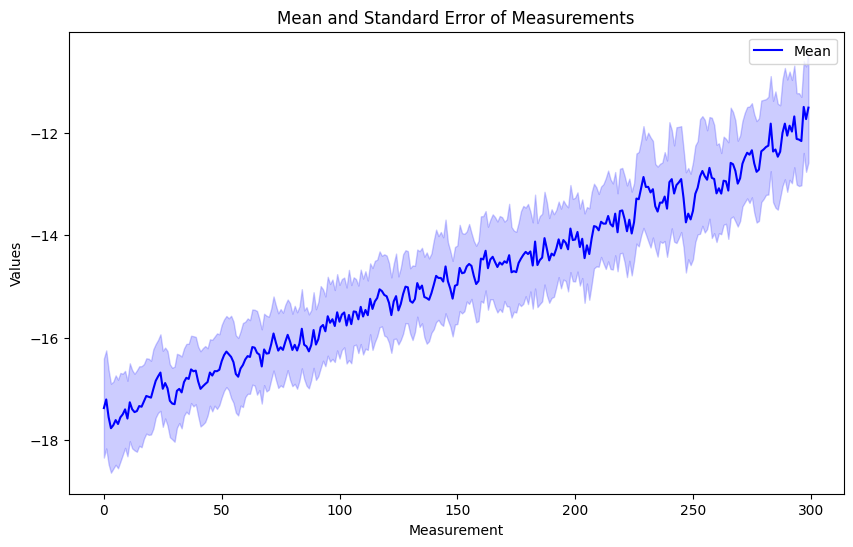

In [8]:
df = pd.DataFrame(loss_hists).T
df = pd.DataFrame(avg_log_likelihoods).T

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# assuming df is your DataFrame where rows represent measurements and columns represent experiments

# Calculate the mean and standard error for each measurement across all experiments
mean = df.mean(axis=1)
std_error = df.sem(axis=1)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the mean line
plt.plot(mean.index, mean.values, color='blue', label='Mean')

# Add the shaded region representing the standard error
plt.fill_between(mean.index, mean.values - std_error, mean.values + std_error, color='blue', alpha=0.2)

# Set the title and labels
plt.title('Mean and Standard Error of Measurements')
plt.xlabel('Measurement')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [4]:
# %%


my_dataset = CSVDataset('/home/samiri/SynDG/DOFLOWS/lifesci.csv',categorical)

categorical_qlevels = []
vdeq_categoricals = {int(k): int(v) for k, v in zip(categorical, categorical_qlevels)}
# Number of samples

enable_cuda = True

device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')

n_sammple = my_dataset.__len__()
# Create the 2-dimensional instance
loss_arr = []
tests_arr = []
_closs = 1e10
_stalecounter = 0

nl = 40
w = 256
ml = 4
lr = 5e-4
fltyp = 'nice'
rbst = True
vlay = 0
nsamp = 2048
nmodes = 200
rndadd = 0.5
usestd = True
useloc = True
initp = 2.5
batch_size = 2**10


dp = 'NF'

    # for w in list(reversed([64,128,192,256,378,512,768,1024,2048,4096,8192])):    
_closs = 1e10
torch.cuda.empty_cache()
gc.collect()
try:
    del model, optimizer, flows, base
except:
    pass
dataloader = DataLoader(my_dataset, batch_size=batch_size, shuffle=True)
num_layers = nl
flows = []
latent_size = len(my_dataset.__getitem__(0))
b = torch.Tensor([1 if i % 2 == 0 else 0 for i in range(latent_size)])
flows = []
if fltyp == 'nsp':
    flows = nsp(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'rnvp':
    flows = rnvp(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'residual':
    flows = residual(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
elif fltyp == 'nice':
    flows = nice(K=nl,dim=latent_size, hidden_units=w, hidden_layers=ml)
    

trnbl = True
# base = nf.distributions.base_extended.GeneralizedGaussianMixture(n_modes=nmodes, rand_p=True, noise_scale=rndadd, dim=latent_size,loc=list(my_dataset.data.median()) if useloc else 0.,scale=list(my_dataset.data.std()) if usestd else 1.,p=initp,device=device,trainable_loc=trnbl, trainable_scale=trnbl,trainable_p=trnbl,trainable_weights=trnbl,ds=my_dataset)

#model = nf.NormalizingFlow(base, flows)
loss_hists = np.array([])
# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lr/10)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)
# target_epsilon = 1.0
# if dp == 'DPSGD':
#     sigma=get_noise_multiplier(
#                     target_epsilon = target_epsilon,
#                     target_delta = 1.52e-5,
#                     sample_rate = batch_size/(len(dataloader.dataset)*0.9),
#                     epochs = max_iter,
#                 )

#     privacy_engine = PrivacyEngine(
#                 model,
#                 batch_size=batch_size,
#                 sample_size=len(dataloader.dataset)*0.9,
#                 noise_multiplier=sigma,
#                 epochs=max_iter,
#                 clipping_mode='MixOpt',
#                 origin_params=None,
#             )
#     privacy_engine.attach(optimizer)










max_norm = 0.5
adjust_rate = 0.01
num_samples = nsamp
show_iter = 200
max_iter = 300
bestloss = 1e10
_stalecounter = 0
pbar = tqdm(range(max_iter))
# Prepare the data for KFold
data = list(dataloader.dataset)
kf = KFold(n_splits=10)

# To store average log likelihood for each epoch
avg_log_likelihoods = []
loss_hists = []

for train_index, test_index in kf.split(data):
    # Reset the model and the best loss for each fold
    base = nf.distributions.base.DiagGaussian(latent_size)
    if dp == 'NF':
        cmin = -2.01
        cmax = 2.01    
        
        base = nf.distributions.base_extended.TruncatedNormal(latent_size,0.,1., cmin, cmax)
        s = base.sample(10000)
        pl = base.log_prob(s).exp()
        print(f'final consumed budget in interval {[cmin,cmax]} is ', np.log(pl.max().item()/pl.min().item())*np.sqrt(max_iter))

    model = nf.NormalizingFlow(base, flows,categoricals=vdeq_categoricals, vardeq_layers=vlay, vardeq_flow_type='shiftscale')
    model = model.to(device)





    loss_hist = np.array([])

    log_likelihoods = []

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lr/10)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)
    target_epsilon = 1.0
    if dp == 'DPSGD':
        sigma=get_noise_multiplier(
                        target_epsilon = target_epsilon,
                        target_delta = 1.52e-5,
                        sample_rate = batch_size/(len(dataloader.dataset)*0.9),
                        epochs = max_iter,
                    )

        privacy_engine = PrivacyEngine(
                    model,
                    batch_size=batch_size,
                    sample_size=len(dataloader.dataset)*0.9,
                    noise_multiplier=sigma,
                    epochs=max_iter,
                    clipping_mode='MixOpt',
                    origin_params=None,
                )
        privacy_engine.attach(optimizer)










    max_norm = 0.5
    adjust_rate = 0.01

    best_params = copy.deepcopy(model.state_dict())
    bestloss = 1e10
    _stalecounter = 0
    pbar = tqdm(range(max_iter))

    
    bestloss = float('inf')
    best_params = copy.deepcopy(model.state_dict())

    # Create dataloaders for this fold
    train_data = [data[i] for i in train_index]
    test_data = [data[i] for i in test_index]
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    for it in pbar:
        for i, features in enumerate(train_dataloader, 0):
            optimizer.zero_grad()
            x = features.to(device)
            try:
                loss = model.forward_kld(x, robust=rbst,rmethod='med',truncated=True)    
                if ~(torch.isnan(loss) | torch.isinf(loss)):
                    loss.backward()
                    optimizer.step()
                    with torch.no_grad():
                        if loss.item()<bestloss:
                            _s,_ = model.sample(1000)
                            if (torch.isnan(_s).sum()==0 & torch.isinf(_s).sum()==0):
                            
                                bestloss = copy.deepcopy(loss.item())
                                best_params = copy.deepcopy(model.state_dict())
                                pbar.set_description(f"Processing {it}, best loss={bestloss}")
                loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
                pbar.set_description(f"Processing {it}, best loss={bestloss}")
            except Exception as e:
                if True:
                    #print(e)
                    with torch.no_grad():
                        model.load_state_dict(best_params)
        

        # with torch.no_grad():
        #     model.eval()
        #     ds_gn = model.sample(len(my_dataset.data))[0].detach().cpu().numpy()
        #     ds_gn = pd.DataFrame(ds_gn, columns=my_dataset.data.columns)
        #     ds_gn.replace([np.inf, -np.inf], np.nan, inplace=True)
        #     ds_gn.dropna(inplace=True)
        #     ds_gn.dropna(axis=1, inplace=True)
        #     ds_gn.dropna(inplace=True)
        #     dict_dtype = my_dataset.data.dtypes.apply(lambda x: x.name).to_dict()
        #     ds_gn = ds_gn.astype(dict_dtype)

        #     ds_gn.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.csv')
        #     my_dataset.data.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_gen.csv')
        #     nan_or_inf_df = ds_gn.isna() | np.isinf(ds_gn)

        #     # Assuming real_data and synthetic_data are your dataframes
        #     feature_names = my_dataset.data.columns

        #     # List of categorical features
        #     categorical_features = []

        #     fig, axs = plt.subplots(2, 5, figsize=(20, 5))

        #     for i, ax in enumerate(axs.flatten()):
        #         if i < len(feature_names):
        #             feature_name = feature_names[i]

        #             # If the feature is categorical
        #             if i in categorical_features:
        #                 real_counts = my_dataset.data[feature_name].value_counts()
        #                 synthetic_counts = ds_gn[feature_name].value_counts()
        #                 all_categories = list(set(real_counts.index) | set(synthetic_counts.index))
                        
        #                 ax.bar(all_categories, [real_counts.get(category, 0) for category in all_categories], color='blue', alpha=0.5, label='Real')
        #                 ax.bar(all_categories, [synthetic_counts.get(category, 0) for category in all_categories], color='red', alpha=0.5, label='Synthetic')
        #             else:
        #                 sns.kdeplot(my_dataset.data[feature_name], ax=ax, color='blue', label='Real')
        #                 sns.kdeplot(ds_gn[feature_name], ax=ax, color='red', label='Synthetic')

        #             ax.set_title(feature_name)
        #             ax.legend()
        #     fig.suptitle(f'Fold {it}', fontsize=15)            
        #     plt.tight_layout()
        #     plt.show()
        #     model.train()  
        #     del ds_gn
        torch.cuda.empty_cache()
        gc.collect()

        scheduler.step(bestloss)
        pbar.set_description(f"Processing {it}, best loss={bestloss}")
        try:
            with torch.no_grad():
                model.eval()
                total_log_likelihood = 0
                for i, features in enumerate(test_dataloader, 0):
                    x = features.to(device)
                    total_log_likelihood += model.forward_kld(x, robust=rbst,rmethod='med',truncated=True)*len(x)    
                avg_log_likelihood = total_log_likelihood / len(test_data)
                log_likelihoods.append(avg_log_likelihood.item())        
                model.train()
        except:
            pass
    avg_log_likelihoods.append(log_likelihoods)     
    loss_hists.append(loss_hist)   
        
del optimizer,scheduler,dataloader,flows    
torch.cuda.empty_cache()
gc.collect()

loss_arr.append([nl,w,bestloss])
torch.cuda.empty_cache()
gc.collect()

# torch.save(model,f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.pt')
# with torch.no_grad():
#     model.eval()

#     ds_gn = model.sample(len(my_dataset.data))[0].detach().cpu().numpy()


# #    del model
#     ds_gn = pd.DataFrame(ds_gn, columns=my_dataset.data.columns)
#     ds_gn.replace([np.inf, -np.inf], np.nan, inplace=True)
#     ds_gn.dropna(inplace=True)
#     ds_gn.dropna(axis=1, inplace=True)
#     ds_gn.dropna(inplace=True)
#     dict_dtype = my_dataset.data.dtypes.apply(lambda x: x.name).to_dict()
#     ds_gn = ds_gn.astype(dict_dtype)

#     ds_gn.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.csv')
#     my_dataset.data.to_csv(f'/home/samiri/SynDG/DOFLOWS/lifesci_gen.csv')
#     nan_or_inf_df = ds_gn.isna() | np.isinf(ds_gn)

#     # Assuming real_data and synthetic_data are your dataframes
#     feature_names = my_dataset.data.columns

#     # List of categorical features
#     categorical_features = []

#     fig, axs = plt.subplots(2, 5, figsize=(10, 20))

#     for i, ax in enumerate(axs.flatten()):
#         if i < len(feature_names):
#             feature_name = feature_names[i]

#             # If the feature is categorical
#             if i in categorical_features:
#                 real_counts = my_dataset.data[feature_name].value_counts()
#                 synthetic_counts = ds_gn[feature_name].value_counts()
#                 all_categories = list(set(real_counts.index) | set(synthetic_counts.index))
                
#                 ax.bar(all_categories, [real_counts.get(category, 0) for category in all_categories], color='blue', alpha=0.5, label='Real')
#                 ax.bar(all_categories, [synthetic_counts.get(category, 0) for category in all_categories], color='red', alpha=0.5, label='Synthetic')
#             else:
#                 sns.kdeplot(my_dataset.data[feature_name], ax=ax, color='blue', label='Real')
#                 sns.kdeplot(ds_gn[feature_name], ax=ax, color='red', label='Synthetic')

#             ax.set_title(feature_name)
#             ax.legend()

#     plt.tight_layout()
#     plt.show()
#     model.train()

# plt.savefig(f'/home/samiri/SynDG/DOFLOWS/lifesci_{dp}_{nl}_{w}_{ml}_{lr}_{fltyp}_{rbst}_{vlay}_{nsamp}_{nmodes}_{rndadd}_{useloc}_{usestd}_{initp}.png')
# del ds_gn
# torch.cuda.empty_cache()
# gc.collect()
# torch.cuda.empty_cache()
# gc.collect()
# torch.cuda.empty_cache()
# gc.collect()




  0%|          | 0/300 [00:00<?, ?it/s]

final consumed budget in interval [-2.01, 2.01] is  181.99805665008503


Processing 299, best loss=-796.1029052734375: 100%|██████████| 300/300 [10:56<00:00,  2.19s/it]


final consumed budget in interval [-2.01, 2.01] is  183.2743137721393


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:56,  1.28s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:53<05:28,  1.28s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:20<05:04,  1.28s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:47<04:31,  1.26s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:13<04:05,  1.26s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:40<03:38,  1.26s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:06<03:13,  1.26s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:32<02:45,  1.26s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:59<02:19,  1.26s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:25<01:53,  1.26s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:52<01:26,  1.26s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:18<01:00,  1.26s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:45<00:34,  1.26s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:11<00:07,  1.26s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:19<00:00,  1.26s/it]


final consumed budget in interval [-2.01, 2.01] is  178.68214395738826


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:54,  1.27s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:53<05:27,  1.27s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:20<05:01,  1.27s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:46<04:34,  1.27s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:13<04:08,  1.28s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:40<03:40,  1.27s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:06<03:15,  1.28s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:33<02:47,  1.27s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [04:00<02:21,  1.28s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:27<01:54,  1.27s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:53<01:27,  1.27s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:20<01:01,  1.27s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:47<00:34,  1.27s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:13<00:07,  1.27s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:21<00:00,  1.27s/it]


final consumed budget in interval [-2.01, 2.01] is  186.29820416184498


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:57,  1.28s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:53<05:28,  1.27s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:20<05:01,  1.27s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:47<04:35,  1.28s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:13<04:08,  1.27s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:40<03:40,  1.27s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:06<03:12,  1.26s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:33<02:44,  1.25s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:59<02:19,  1.26s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:25<01:53,  1.26s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:52<01:26,  1.26s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:18<01:00,  1.26s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:45<00:33,  1.26s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:11<00:07,  1.25s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:19<00:00,  1.26s/it]


final consumed budget in interval [-2.01, 2.01] is  194.24096113756804


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:50,  1.26s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:52<05:24,  1.26s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:19<04:57,  1.26s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:45<04:31,  1.26s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:12<04:05,  1.26s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:38<03:38,  1.26s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:05<03:14,  1.27s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:31<02:48,  1.28s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:58<02:21,  1.28s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:25<01:55,  1.28s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:52<01:28,  1.28s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:19<01:01,  1.28s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:45<00:34,  1.28s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:12<00:07,  1.28s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:20<00:00,  1.27s/it]


final consumed budget in interval [-2.01, 2.01] is  176.02363288284053


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:54,  1.27s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:53<05:21,  1.25s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:19<04:56,  1.25s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:45<04:29,  1.25s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:11<04:02,  1.25s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:37<03:36,  1.24s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:03<03:10,  1.24s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:29<02:43,  1.24s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:56<02:17,  1.24s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:22<01:51,  1.24s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:48<01:25,  1.24s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:14<00:59,  1.25s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:40<00:33,  1.24s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:06<00:07,  1.24s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:13<00:00,  1.25s/it]


final consumed budget in interval [-2.01, 2.01] is  172.88629788500032


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:46,  1.24s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:52<05:21,  1.25s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:18<04:54,  1.24s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:44<04:30,  1.25s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:10<04:02,  1.24s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:36<03:32,  1.22s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:02<03:07,  1.22s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:27<02:41,  1.23s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:53<02:15,  1.22s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:19<01:50,  1.23s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:45<01:24,  1.22s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:10<00:58,  1.23s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 273, best loss=inf:  91%|█████████ | 273/300 [05:36<00:33,  1.23s/it]

Epoch 00273: reducing learning rate of group 0 to 6.1035e-08.


Processing 294, best loss=inf:  98%|█████████▊| 294/300 [06:02<00:07,  1.24s/it]

Epoch 00294: reducing learning rate of group 0 to 3.0518e-08.


Processing 299, best loss=inf: 100%|██████████| 300/300 [06:09<00:00,  1.23s/it]


final consumed budget in interval [-2.01, 2.01] is  188.18074222827528


Processing 21, best loss=inf:   7%|▋         | 21/300 [00:26<05:48,  1.25s/it]

Epoch 00021: reducing learning rate of group 0 to 2.5000e-04.


Processing 42, best loss=inf:  14%|█▍        | 42/300 [00:52<05:21,  1.25s/it]

Epoch 00042: reducing learning rate of group 0 to 1.2500e-04.


Processing 63, best loss=inf:  21%|██        | 63/300 [01:18<04:55,  1.25s/it]

Epoch 00063: reducing learning rate of group 0 to 6.2500e-05.


Processing 84, best loss=inf:  28%|██▊       | 84/300 [01:44<04:29,  1.25s/it]

Epoch 00084: reducing learning rate of group 0 to 3.1250e-05.


Processing 105, best loss=inf:  35%|███▌      | 105/300 [02:11<04:04,  1.25s/it]

Epoch 00105: reducing learning rate of group 0 to 1.5625e-05.


Processing 126, best loss=inf:  42%|████▏     | 126/300 [02:37<03:38,  1.26s/it]

Epoch 00126: reducing learning rate of group 0 to 7.8125e-06.


Processing 147, best loss=inf:  49%|████▉     | 147/300 [03:03<03:12,  1.26s/it]

Epoch 00147: reducing learning rate of group 0 to 3.9063e-06.


Processing 168, best loss=inf:  56%|█████▌    | 168/300 [03:30<02:45,  1.26s/it]

Epoch 00168: reducing learning rate of group 0 to 1.9531e-06.


Processing 189, best loss=inf:  63%|██████▎   | 189/300 [03:56<02:18,  1.25s/it]

Epoch 00189: reducing learning rate of group 0 to 9.7656e-07.


Processing 210, best loss=inf:  70%|███████   | 210/300 [04:22<01:51,  1.24s/it]

Epoch 00210: reducing learning rate of group 0 to 4.8828e-07.


Processing 231, best loss=inf:  77%|███████▋  | 231/300 [04:48<01:25,  1.24s/it]

Epoch 00231: reducing learning rate of group 0 to 2.4414e-07.


Processing 252, best loss=inf:  84%|████████▍ | 252/300 [05:15<00:59,  1.24s/it]

Epoch 00252: reducing learning rate of group 0 to 1.2207e-07.


Processing 269, best loss=inf:  90%|█████████ | 270/300 [05:37<00:37,  1.25s/it]


KeyboardInterrupt: 

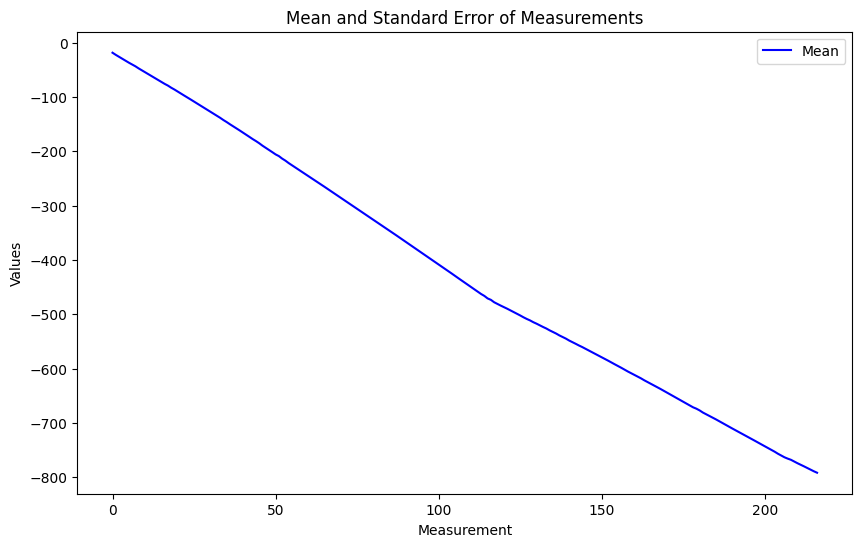

In [5]:
df = pd.DataFrame(loss_hists).T
df = pd.DataFrame(avg_log_likelihoods).T

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# assuming df is your DataFrame where rows represent measurements and columns represent experiments

# Calculate the mean and standard error for each measurement across all experiments
mean = df.mean(axis=1)
std_error = df.sem(axis=1)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the mean line
plt.plot(mean.index, mean.values, color='blue', label='Mean')

# Add the shaded region representing the standard error
plt.fill_between(mean.index, mean.values - std_error, mean.values + std_error, color='blue', alpha=0.2)

# Set the title and labels
plt.title('Mean and Standard Error of Measurements')
plt.xlabel('Measurement')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()